# Order Cancellation Prediction
In this Chapter, I am going to do one of a supervised learning in Machine Learning Projects. I am going to build a machine that will be able to classifies which order is going to be cancelled by the characteristics of the order itself. The benefits of this projects for business process is as follows:
1. Help product manager to set a lower limit for general stocks based on number of cancellation predicted
2. Reduce cost specifically in marketing and customer services in terms of time, focus, and energy.
3. Improve Customer Services Quality

Here are the steps that I took in finishing this Classification Projects :
1. Data Cleaning
    - Creating Target Feature : "cancellation_list"
    - Create Dummies Variable for K-Means Cluster
2. EDA (Minor)
    - Cancellation Proportion on Datasets
3. Model Deployment
    - Data Preparation :
    - Data Splitting
    - Fitting Model with train data and Predicting Model with Test Data
    - Model Visualization and Evaluation :
4. Model Optimization :
    - Handling Imbalance Data with Oversampling (SMOTE) and undersampling (NearMiss)
    - Hyperparameter Tuning (RandomizedSearchCV)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = pd.read_csv("E-commerce_data_after_clustering.csv")
data.head()

,InvoiceNo,InvoiceDate,Date,Years,Months,Days,Hours,DayOfMonth,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,TotalCost,K-Means_Cluster
0,536365,2010-12-01 08:26:00,2010-12-01,2010,12,3,8,1,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,United Kingdom,15.30,Group 4
1,536366,2010-12-01 08:28:00,2010-12-01,2010,12,3,8,1,22633,HAND WARMER UNION JACK,6,1.85,17850,United Kingdom,11.10,Group 4
2,536367,2010-12-01 08:34:00,2010-12-01,2010,12,3,8,1,84879,ASSORTED COLOUR BIRD ORNAMENT,32,1.69,13047,United Kingdom,54.08,Group 4
3,536368,2010-12-01 08:34:00,2010-12-01,2010,12,3,8,1,22960,JAM MAKING SET WITH JARS,6,4.25,13047,United Kingdom,25.50,Group 4
4,536369,2010-12-01 08:35:00,2010-12-01,2010,12,3,8,1,21756,BATH BUILDING BLOCK WORD,3,5.95,13047,United Kingdom,17.85,Group 4


In [66]:
data[(data['InvoiceNo'].str.contains('C'))]

,InvoiceNo,InvoiceDate,Date,Years,Months,Days,Hours,DayOfMonth,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,TotalCost,K-Means_Cluster,cancellation_list
16,C536379,2010-12-01 09:41:00,2010-12-01,2010,12,3,9,1,D,Discount,-1,27.50,14527,United Kingdom,-27.50,Outlier,1
18,C536383,2010-12-01 09:49:00,2010-12-01,2010,12,3,9,1,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,4.65,15311,United Kingdom,-4.65,Outlier,1
26,C536391,2010-12-01 10:24:00,2010-12-01,2010,12,3,10,1,22556,PLASTERS IN TIN CIRCUS PARADE,-12,1.65,17548,United Kingdom,-19.80,Outlier,1
62,C536506,2010-12-01 12:38:00,2010-12-01,2010,12,3,12,1,22960,JAM MAKING SET WITH JARS,-6,4.25,17897,United Kingdom,-25.50,Group 2,1
87,C536543,2010-12-01 14:30:00,2010-12-01,2010,12,3,14,1,22632,HAND WARMER RED RETROSPOT,-1,2.10,17841,United Kingdom,-2.10,Group 3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22153,C581484,2011-12-09 09:27:00,2011-12-09,2011,12,5,9,9,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2.08,16446,United Kingdom,-168469.60,Outlier,1
22159,C581490,2011-12-09 09:57:00,2011-12-09,2011,12,5,9,9,22178,VICTORIAN GLASS HANGING T-LIGHT,-12,1.95,14397,United Kingdom,-23.40,Outlier,1
22165,C581499,2011-12-09 10:28:00,2011-12-09,2011,12,5,10,9,M,Manual,-1,224.69,15498,United Kingdom,-224.69,Outlier,1
22174,C581568,2011-12-09 11:57:00,2011-12-09,2011,12,5,11,9,21258,VICTORIAN SEWING BOX LARGE,-5,10.95,15311,United Kingdom,-54.75,Outlier,1


## Section 1 : Data Cleaning

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22190 entries, 0 to 22189
Data columns (total 16 columns):
InvoiceNo          22190 non-null object
InvoiceDate        22190 non-null object
Date               22190 non-null object
Years              22190 non-null int64
Months             22190 non-null int64
Days               22190 non-null int64
Hours              22190 non-null int64
DayOfMonth         22190 non-null int64
StockCode          22190 non-null object
Description        22190 non-null object
Quantity           22190 non-null int64
UnitPrice          22190 non-null float64
CustomerID         22190 non-null int64
Country            22190 non-null object
TotalCost          22190 non-null float64
K-Means_Cluster    22190 non-null object
dtypes: float64(2), int64(7), object(7)
memory usage: 2.7+ MB


In [9]:
data.head(3)

,InvoiceNo,InvoiceDate,Date,Years,Months,Days,Hours,DayOfMonth,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,TotalCost,K-Means_Cluster
0,536365,2010-12-01 08:26:00,2010-12-01,2010,12,3,8,1,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,United Kingdom,15.30,Group 4
1,536366,2010-12-01 08:28:00,2010-12-01,2010,12,3,8,1,22633,HAND WARMER UNION JACK,6,1.85,17850,United Kingdom,11.10,Group 4
2,536367,2010-12-01 08:34:00,2010-12-01,2010,12,3,8,1,84879,ASSORTED COLOUR BIRD ORNAMENT,32,1.69,13047,United Kingdom,54.08,Group 4


### Cleaning 01 : Creating Target Feature : "cancellation_list"

In [10]:
cancellation_list = []
for i in data['InvoiceNo'] :
    if "C" in i :
        cancellation_list.append(1)
    else :
        cancellation_list.append(0)
data['cancellation_list'] = cancellation_list
data.head(3)

,InvoiceNo,InvoiceDate,Date,Years,Months,Days,Hours,DayOfMonth,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,TotalCost,K-Means_Cluster,cancellation_list
0,536365,2010-12-01 08:26:00,2010-12-01,2010,12,3,8,1,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,United Kingdom,15.30,Group 4,0
1,536366,2010-12-01 08:28:00,2010-12-01,2010,12,3,8,1,22633,HAND WARMER UNION JACK,6,1.85,17850,United Kingdom,11.10,Group 4,0
2,536367,2010-12-01 08:34:00,2010-12-01,2010,12,3,8,1,84879,ASSORTED COLOUR BIRD ORNAMENT,32,1.69,13047,United Kingdom,54.08,Group 4,0


### Cleaning 02 : Create Dummies Variable for K-Means Cluster

In [11]:
cluster_dummies = pd.get_dummies(data['K-Means_Cluster'], prefix = 'Cluster')
frames = [data, cluster_dummies]
data_pred = pd.concat(frames, axis=1)
data_pred.head(3)

,InvoiceNo,InvoiceDate,Date,Years,Months,Days,Hours,DayOfMonth,StockCode,Description,...,CustomerID,Country,TotalCost,K-Means_Cluster,cancellation_list,Cluster_Group 1,Cluster_Group 2,Cluster_Group 3,Cluster_Group 4,Cluster_Outlier
0,536365,2010-12-01 08:26:00,2010-12-01,2010,12,3,8,1,85123A,WHITE HANGING HEART T-LIGHT HOLDER,...,17850,United Kingdom,15.30,Group 4,0,0,0,0,1,0
1,536366,2010-12-01 08:28:00,2010-12-01,2010,12,3,8,1,22633,HAND WARMER UNION JACK,...,17850,United Kingdom,11.10,Group 4,0,0,0,0,1,0
2,536367,2010-12-01 08:34:00,2010-12-01,2010,12,3,8,1,84879,ASSORTED COLOUR BIRD ORNAMENT,...,13047,United Kingdom,54.08,Group 4,0,0,0,0,1,0


## Section 2 :  Minor EDA

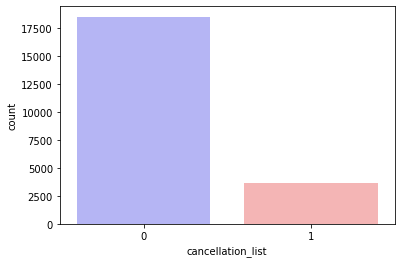

In [12]:
sns.countplot(x='cancellation_list', data = data, palette='bwr')
plt.show()

**DESCRIPTION :** 

0 : Not Cancel

1 : Cancel

It seems that there is an imbalance issues, but let's try the conventional way and see the result, I will do Imbalance Handling if the model performance is bad

In [13]:
countNoCancel = len(data[data['cancellation_list'] == 0])
countCancel = len(data[data['cancellation_list'] == 1])
print("percentage of not-cancelled Order : {:.2f}%".format((countNoCancel / (len(data['cancellation_list']))*100)))
print("percentage of cancelled order : {:.2f}%".format((countCancel / (len(data['cancellation_list']))*100)))

percentage of not-cancelled Order : 83.53%
percentage of cancelled order : 16.47%


In [14]:
countCancel

3654

In [15]:
data_pred.columns

Index(['InvoiceNo', 'InvoiceDate', 'Date', 'Years', 'Months', 'Days', 'Hours',
       'DayOfMonth', 'StockCode', 'Description', 'Quantity', 'UnitPrice',
       'CustomerID', 'Country', 'TotalCost', 'K-Means_Cluster',
       'cancellation_list', 'Cluster_Group 1', 'Cluster_Group 2',
       'Cluster_Group 3', 'Cluster_Group 4', 'Cluster_Outlier'],
      dtype='object')

In [60]:
data_pred

,cancellation_list,Months,Days,Hours,DayOfMonth,UnitPrice,Cluster_Group 1,Cluster_Group 2,Cluster_Group 3,Cluster_Group 4
0,0,12,3,8,1,2.55,0,0,0,1
1,0,12,3,8,1,1.85,0,0,0,1
2,0,12,3,8,1,1.69,0,0,0,1
3,0,12,3,8,1,4.25,0,0,0,1
4,0,12,3,8,1,5.95,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
22185,0,12,5,12,9,1.45,0,0,0,0
22186,0,12,5,12,9,0.72,0,0,0,0
22187,0,12,5,12,9,0.39,0,0,0,0
22188,0,12,5,12,9,2.95,0,0,0,0


## Section 3 : Model Deployment
Here are the key step that i took in Model Deployment:
1. Data Preparation :
    - data_pred_full : using all numerical data from the dataset
    - data_pred : using all numerical data from dataset except for Quantity and Total Cost (because these feature causes overfitting later on in the projects.
2. Data Splitting
    - Splitting Feature and Target Variable
    - Splitting train and test dataset
3. Fitting Model with train data and Predicting Model with Test Data
    - In this Model Fitting i am using RandomForestClassifier
4. Model Visualization and Evaluation :
    - Confusion Matrix
    - Classification Report
5. Model Selection

### 1. Data Preparation

In [ ]:
data_pred_full[data_pred_full['Sto']]

In [58]:
data_pred_full[data_pred_full['cancellation_list']==1]['Quantity']

16          -1
18          -1
26         -12
62          -6
87          -1
         ...  
22153   -80995
22159      -12
22165       -1
22174       -5
22175       -1
Name: Quantity, Length: 3654, dtype: int64

In [16]:
#data_pred_full : all numerical data from the dataset
data_pred_full = data_pred[['cancellation_list','Months', 'Days', 'Hours', 'DayOfMonth',
                       'UnitPrice','Quantity','TotalCost','Cluster_Group 1', 'Cluster_Group 2', 
                       'Cluster_Group 3', 'Cluster_Group 4']]
data_pred_full.head()

,cancellation_list,Months,Days,Hours,DayOfMonth,UnitPrice,Quantity,TotalCost,Cluster_Group 1,Cluster_Group 2,Cluster_Group 3,Cluster_Group 4
0,0,12,3,8,1,2.55,6,15.30,0,0,0,1
1,0,12,3,8,1,1.85,6,11.10,0,0,0,1
2,0,12,3,8,1,1.69,32,54.08,0,0,0,1
3,0,12,3,8,1,4.25,6,25.50,0,0,0,1
4,0,12,3,8,1,5.95,3,17.85,0,0,0,1


In [17]:
#data_pred : all numerical data from dataset except Quantity and TotalCost
data_pred = data_pred[['cancellation_list','Months', 'Days', 'Hours', 'DayOfMonth',
                       'UnitPrice', 'Cluster_Group 1', 'Cluster_Group 2', 
                       'Cluster_Group 3', 'Cluster_Group 4']]
data_pred.head()

,cancellation_list,Months,Days,Hours,DayOfMonth,UnitPrice,Cluster_Group 1,Cluster_Group 2,Cluster_Group 3,Cluster_Group 4
0,0,12,3,8,1,2.55,0,0,0,1
1,0,12,3,8,1,1.85,0,0,0,1
2,0,12,3,8,1,1.69,0,0,0,1
3,0,12,3,8,1,4.25,0,0,0,1
4,0,12,3,8,1,5.95,0,0,0,1


### 2. Data Splitting

In [18]:
#Splitting Feature and Target Variable for data_prep dataset
x = data_pred.drop(['cancellation_list'], axis=1)
y = data_pred['cancellation_list'].values

In [19]:
#Splitting Feature and target variable for data_prep_full dataset
x_2 = data_pred_full.drop(['cancellation_list'], axis=1)
y_2 = data_pred_full['cancellation_list'].values

In [20]:
#Splitting Train and Test data for both data_prep and data_prep dataset
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_2train, x_2test, y_2train, y_2test = train_test_split(x_2, y_2, test_size=0.2, random_state=0)

### 3. Fitting and Predicting Model

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#Fitting model with train data from data_prep and data_prep_full
model_RF = RandomForestClassifier(n_estimators = 1000, max_depth = 10)
model_RF.fit(x_train, y_train)
model_RF.fit(x_2train, y_2train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [22]:
#Predicting Model from data_prep_full
y_pred_RF_2 = model_RF.predict(x_2test)

In [23]:
#Predicting Model from data_prep
model_RF = RandomForestClassifier(n_estimators = 1000, max_depth = 10)
model_RF.fit(x_train, y_train)
y_pred_RF = model_RF.predict(x_test)

### 4. Model Visualization and Evaluation

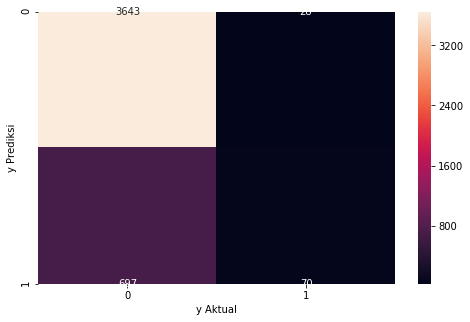

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      3671
           1       0.71      0.09      0.16       767

    accuracy                           0.84      4438
   macro avg       0.78      0.54      0.54      4438
weighted avg       0.82      0.84      0.78      4438



In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

confusion_matrix(y_test, y_pred_RF) 

#Visualizing Confusion Matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_RF), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y Aktual")
plt.ylabel("y Prediksi")
plt.title('')
plt.show()

# Confusion Matrix Report
print(classification_report(y_test, y_pred_RF))

## Section 4 : Model Optimization
here are key points that i done in trying to optimize my model :
1. Handling Imbalance Data Using over and under sampling (SMOTE and NearMiss)
2. Hyperparameter Tuning Using RandomizedSearchCV

### 1. Handling Imbalance 01 : Oversampling using SMOTE for data_prep

In [25]:

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
# import SMOTE module from imblearn library 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
x_train_res, y_train_res = sm.fit_sample(x_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 2887
Before OverSampling, counts of label '0': 14865 

After OverSampling, the shape of train_X: (29730, 9)
After OverSampling, the shape of train_y: (29730,) 

After OverSampling, counts of label '1': 14865
After OverSampling, counts of label '0': 14865


In [26]:
model_RF = RandomForestClassifier()
model_RF.fit(x_train_res, y_train_res.ravel())

y_pred_RF = model_RF.predict(x_test)

# Confusion Matrix Report
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      3671
           1       0.37      0.33      0.35       767

    accuracy                           0.79      4438
   macro avg       0.62      0.61      0.61      4438
weighted avg       0.78      0.79      0.78      4438



### 2. Handling Imbalance 02 : Undersampling using NearMiss for data_prep

In [27]:
print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before Undersampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
# apply near miss 
from imblearn.under_sampling import NearMiss 
nr = NearMiss() 
  
X_train_miss, y_train_miss = nr.fit_sample(x_train, y_train.ravel()) 
  
print('After Undersampling, the shape of train_X: {}'.format(X_train_miss.shape)) 
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape)) 
  
print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1))) 
print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0)))

Before Undersampling, counts of label '1': 2887
Before Undersampling, counts of label '0': 14865 

After Undersampling, the shape of train_X: (5774, 9)
After Undersampling, the shape of train_y: (5774,) 

After Undersampling, counts of label '1': 2887
After Undersampling, counts of label '0': 2887


In [28]:
model_RF = RandomForestClassifier()
model_RF.fit(X_train_miss, y_train_miss.ravel())

y_pred_RF = model_RF.predict(x_test)

# Confusion Matrix Report
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.88      0.45      0.59      3671
           1       0.21      0.70      0.32       767

    accuracy                           0.49      4438
   macro avg       0.54      0.57      0.46      4438
weighted avg       0.76      0.49      0.55      4438



### 3. Hyperparameter Tuning Using RandomizedSearchCV for data_prep

In [29]:
#Set a parameter combination options for randomizedsearch
max_depth = [10,20,30,40,50,60,70,80,90,100]
min_samples_leaf = [1,2,4]
min_samples_split = [2,5,10]
n_estimators = [200,400,600,800,1000,1200,1400,1600,1800,2000]

param = {'max_depth': max_depth, 'min_samples_leaf': min_samples_leaf, 
         'min_samples_split': min_samples_split, 'n_estimators': n_estimators}
param

{'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [30]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [50]:
model_RF = RandomForestClassifier()
model_RF_RS = RandomizedSearchCV(estimator=model_RF, param_distributions = param, cv = 5)

In [32]:
model_RF_RS.fit(x_train, y_train)
model_RF_RS.best_params_

{'n_estimators': 1800,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_depth': 20}

In [51]:
model_RF_Baru = RandomForestClassifier(n_estimators=1800, 
                                       min_samples_split= 5,
                                       min_samples_leaf= 2,
                                       max_depth= 20)

model_RF_Baru.fit(x_train, y_train)
model_RF_Baru.score(x_test, y_test)

0.8391167192429022

### Model Visualization (Model Selected 02)

In [52]:
y_pred_RF = model_RF_Baru.predict(x_test)

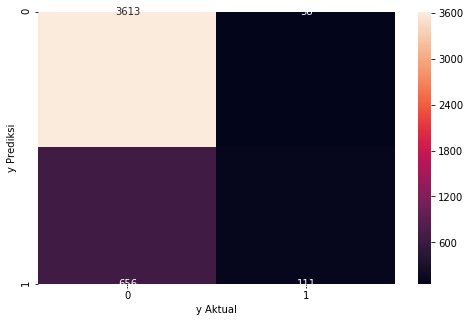

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      3671
           1       0.66      0.14      0.24       767

    accuracy                           0.84      4438
   macro avg       0.75      0.56      0.57      4438
weighted avg       0.81      0.84      0.79      4438



In [53]:
confusion_matrix(y_test, y_pred_RF) 

#Visualizing Confusion Matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_RF), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y Aktual")
plt.ylabel("y Prediksi")
plt.title('')
plt.show()

# Confusion Matrix Report
print(classification_report(y_test, y_pred_RF))

In [54]:
confusion_matrix(y_test, y_pred_RF) 

array([[3613,   58],
       [ 656,  111]], dtype=int64)

In [56]:
import joblib
joblib.dump(model_RF_Baru, 'model_final_2')

['model_final_2']

### 4. Hyperparameter Tuning + Handling Imbalance

In [37]:
model_RF_RS.fit(x_train_res, y_train_res.ravel())
model_RF_RS.best_params_

{'n_estimators': 1400,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_depth': 80}

In [38]:
model_RF_Baru_2 = RandomForestClassifier(n_estimators=1600, 
                                       min_samples_split= 5,
                                       min_samples_leaf= 1,
                                       max_depth= 30)

model_RF_Baru_2.fit(x_train_res, y_train_res.ravel())
model_RF_Baru_2.score(x_test, y_test)

0.793600721045516

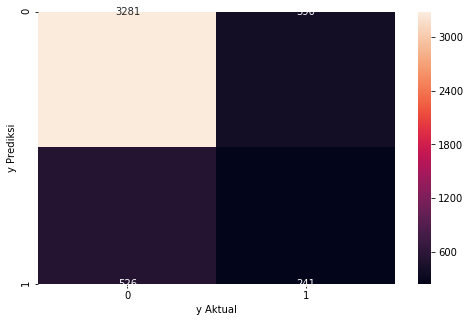

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      3671
           1       0.38      0.31      0.34       767

    accuracy                           0.79      4438
   macro avg       0.62      0.60      0.61      4438
weighted avg       0.78      0.79      0.79      4438



In [39]:
y_pred_RF = model_RF_Baru_2.predict(x_test)
confusion_matrix(y_test, y_pred_RF) 

#Visualizing Confusion Matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_RF), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y Aktual")
plt.ylabel("y Prediksi")
plt.title('')
plt.show()

# Confusion Matrix Report
print(classification_report(y_test, y_pred_RF))

### 5. Model Visualization and evaluation for data_prep

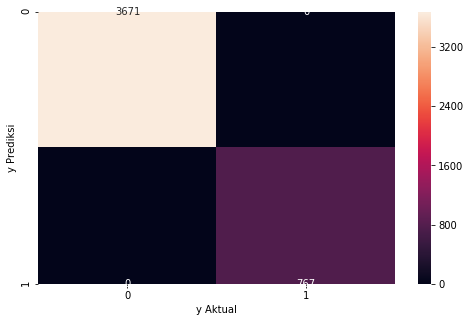

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3671
           1       1.00      1.00      1.00       767

    accuracy                           1.00      4438
   macro avg       1.00      1.00      1.00      4438
weighted avg       1.00      1.00      1.00      4438



In [40]:
confusion_matrix(y_2test, y_pred_RF_2) 

#Visualizing Confusion Matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_2test, y_pred_RF_2), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y Aktual")
plt.ylabel("y Prediksi")
plt.title('')
plt.show()

# Confusion Matrix Report
print(classification_report(y_2test, y_pred_RF_2))

### 6. Model Optimization 01 for data_prep : Handling Imbalance data with oversampling using SMOTE

In [41]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
# import SMOTE module from imblearn library 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
x_train_res_2, y_train_res_2 = sm.fit_sample(x_2train, y_2train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(x_train_res_2.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res_2.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res_2 == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res_2 == 0)))

Before OverSampling, counts of label '1': 2887
Before OverSampling, counts of label '0': 14865 

After OverSampling, the shape of train_X: (29730, 11)
After OverSampling, the shape of train_y: (29730,) 

After OverSampling, counts of label '1': 14865
After OverSampling, counts of label '0': 14865


In [42]:
model_RF = RandomForestClassifier()
model_RF.fit(x_train_res_2, y_train_res_2.ravel())

y_pred_RF = model_RF.predict(x_2test)

# Confusion Matrix Report
print(classification_report(y_2test, y_pred_RF))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3671
           1       1.00      1.00      1.00       767

    accuracy                           1.00      4438
   macro avg       1.00      1.00      1.00      4438
weighted avg       1.00      1.00      1.00      4438



### 7. Model Optimization 02 for data_prep : Handling Imbalance data with undersampling using NearMiss

In [43]:
print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before Undersampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
# apply near miss 
from imblearn.under_sampling import NearMiss 
nr = NearMiss() 
  
X_train_miss_2, y_train_miss_2 = nr.fit_sample(x_2train, y_2train.ravel()) 
  
print('After Undersampling, the shape of train_X: {}'.format(X_train_miss_2.shape)) 
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss_2.shape)) 
  
print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss_2 == 1))) 
print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss_2 == 0)))

Before Undersampling, counts of label '1': 2887
Before Undersampling, counts of label '0': 14865 

After Undersampling, the shape of train_X: (5774, 11)
After Undersampling, the shape of train_y: (5774,) 

After Undersampling, counts of label '1': 2887
After Undersampling, counts of label '0': 2887


### Model Optimization 03 for data_prep_full with Cross Validation (hyperparameter) using RandomizedSearchCV

In [44]:
model_RF = RandomForestClassifier()
model_RF.fit(X_train_miss_2, y_train_miss_2.ravel())

y_pred_RF = model_RF.predict(x_2test)

# Confusion Matrix Report
print(classification_report(y_2test, y_pred_RF))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3671
           1       1.00      1.00      1.00       767

    accuracy                           1.00      4438
   macro avg       1.00      1.00      1.00      4438
weighted avg       1.00      1.00      1.00      4438



In [45]:
model_RF_RS.fit(x_2train, y_2train)
model_RF_RS.best_params_

{'n_estimators': 2000,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_depth': 60}

In [46]:
model_RF_Baru = RandomForestClassifier(n_estimators=1600, 
                                       min_samples_split= 5,
                                       min_samples_leaf= 1,
                                       max_depth= 30)

model_RF_Baru.fit(x_2train, y_2train)
model_RF_Baru.score(x_2test, y_2test)

1.0

## Model Visualization and Evaluation (MODEL SELECTED 02)

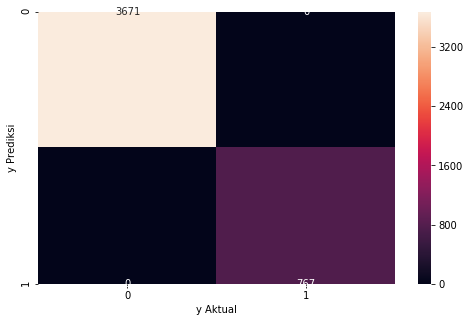

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3671
           1       1.00      1.00      1.00       767

    accuracy                           1.00      4438
   macro avg       1.00      1.00      1.00      4438
weighted avg       1.00      1.00      1.00      4438



In [47]:
y_pred_RF = model_RF_Baru.predict(x_2test)
confusion_matrix(y_2test, y_pred_RF) 

#Visualizing Confusion Matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_2test, y_pred_RF), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y Aktual")
plt.ylabel("y Prediksi")
plt.title('')
plt.show()

# Confusion Matrix Report
print(classification_report(y_2test, y_pred_RF))

In [48]:
confusion_matrix(y_2test, y_pred_RF)

array([[3671,    0],
       [   0,  767]], dtype=int64)

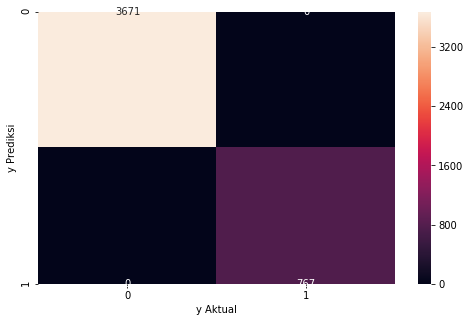

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3671
           1       1.00      1.00      1.00       767

    accuracy                           1.00      4438
   macro avg       1.00      1.00      1.00      4438
weighted avg       1.00      1.00      1.00      4438



In [49]:
y_pred_RF = model_RF_Baru.predict(x_2test)
confusion_matrix(y_2test, y_pred_RF) 

#Visualizing Confusion Matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_2test, y_pred_RF), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y Aktual")
plt.ylabel("y Prediksi")
plt.title('')
plt.show()

# Confusion Matrix Report
print(classification_report(y_2test, y_pred_RF))

### Saving Model Using Joblib for DASHBOARD

In [55]:
import joblib
joblib.dump(model_RF_Baru, 'model_final_1')

['model_final_1']

In [56]:
model_final = joblib.load('model_final_1')